# Modelos

In [1]:
import IPython
import IPython.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
import scipy as sp
from statsmodels.graphics.gofplots import qqplot
from itertools import cycle, islice
import random

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/Shareddrives/10K challenge/data.csv")

# Funcion que devuelve datos en un intervalo de tiempo dado
def filter_by_dates(begin,end,data):
    return data[data[data['dates']==begin].index[0]:data[data['dates']==end].index[0]]

#df = filter_by_dates('2005-01-31','2019-12-31',df)

In [4]:
# Codigo importado del notebook de analisis

interest_groups = df.columns[-10:-2]
continents = ["Africa", "Americas", "Asia", "Europe", "Oceania"]
regions = [name for name in df.columns[250:272] if name not in continents]
interest_groups_df = df[interest_groups]
continents_df = df[continents]
regions_df = df[regions]
world_lapse=df.copy()
interest_groups_df_lapse=interest_groups_df.copy()
continents_df_lapse=continents_df.copy()
regions_df_lapse=regions_df.copy()
dfs=[world_lapse,interest_groups_df_lapse,continents_df_lapse,regions_df_lapse]
def time_group(lapse,n):
    labels=[]
    for i in range(1,int(np.ceil(n/lapse))+1):
        labels.extend(np.ones(lapse).astype(int)*i)
    return labels[0:n]
for each_df in dfs:
    each_df['Trimester']=time_group(3,len(each_df))
    each_df['Semester']=time_group(6,len(each_df))
    each_df['Year']=time_group(12,len(each_df))
    each_df['Lustrum']=time_group(60,len(each_df))
    each_df['Decade']=time_group(120,len(each_df))
world_data={'Month':df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    world_data[time_interval]=(world_lapse.groupby(time_interval).mean())[world_lapse.columns[1:285]]

interest_groups_data={'Month':interest_groups_df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    interest_groups_data[time_interval]=(interest_groups_df_lapse.groupby(time_interval).mean())[interest_groups]
    
continents_data={'Month':continents_df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    continents_data[time_interval]=(continents_df_lapse.groupby(time_interval).mean())[continents]
    
regions_data={'Month':regions_df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    regions_data[time_interval]=(regions_df_lapse.groupby(time_interval).mean())[regions]
    
grouped_data={'World':world_data,
            'Interest Groups':interest_groups_data,
            'Continents':continents_data,
            'Regions':regions_data}

## Datos a usar

In [5]:
world_lapse.columns[1:249]

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       ...
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wake Island',
       'Wallis and Futuna Islands', 'Western Sahara', 'Yemen', 'Yugoslav SFR',
       'Zambia', 'Zimbabwe', 'World'],
      dtype='object', length=248)

In [6]:
to_analyze = 'World'
group = 'World'
time_lapse = 'Month'

data = df[world_lapse.columns[1:-6]]
#data=pd.DataFrame(grouped_data[group][time_lapse][to_analyze]).dropna()
#data=(data-data.mean())/data.std()
data

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belgium-Luxembourg,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,...,Yugoslav SFR,Zambia,Zimbabwe,World,Africa,Eastern Africa,Middle Africa,Northern Africa,Southern Africa,Western Africa,Americas,Northern America,Central America,Caribbean,South America,Asia,Central Asia,Eastern Asia,Southern Asia,South-Eastern Asia,Western Asia,Europe,Eastern Europe,Northern Europe,Southern Europe,Western Europe,Oceania,Australia and New Zealand,Melanesia,Micronesia,Polynesia,European Union,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries,Annex I countries,Non-Annex I countries,OECD
0,0.777,0.180,-1.022,0.565,-0.518,0.209,0.617,-1.807,0.656,-0.091,NaN,0.226,0.287,-0.801,NaN,-0.322,0.646,0.928,0.560,NaN,NaN,0.112,0.182,0.293,1.221,0.449,NaN,-0.728,-0.108,0.565,-0.132,0.162,-0.354,0.018,-0.893,-0.343,0.314,0.462,NaN,0.575,...,-0.020,0.172,-0.490,0.399,0.105,0.371,0.434,0.127,-0.372,-0.350,0.339,0.699,-0.240,0.300,0.015,0.182,NaN,-0.079,0.537,-0.099,0.585,1.086,1.228,0.992,-0.337,-0.070,0.235,0.270,-0.282,0.217,0.261,0.169,0.349,0.169,-0.034,0.350,0.266,0.808,0.108,0.437
1,-1.743,-0.625,0.196,0.261,3.383,-0.545,0.382,-0.471,0.410,-0.077,NaN,0.123,-0.002,2.903,NaN,1.086,-0.303,-1.527,0.293,NaN,NaN,4.081,0.137,-1.484,-0.665,0.052,NaN,-0.181,-0.243,0.394,0.105,0.124,-1.846,-0.639,0.330,0.349,-1.085,0.301,NaN,-1.169,...,0.878,-0.502,-0.487,0.263,-0.814,-0.115,-1.057,-0.907,0.164,-1.571,0.279,0.684,-0.111,0.930,-0.128,-0.136,NaN,0.592,-1.269,0.231,-0.649,1.921,1.722,3.896,1.507,3.678,-0.005,-0.013,0.120,0.359,0.105,3.151,-0.897,-0.730,0.195,-1.058,-0.594,1.155,-0.384,0.756
2,0.516,0.995,-1.051,-0.831,1.559,0.170,0.004,-2.035,-0.265,-0.519,NaN,0.008,0.238,2.721,NaN,0.913,-0.885,1.024,0.848,NaN,NaN,2.319,0.538,-0.534,0.007,0.193,NaN,-0.541,-0.018,0.344,0.182,2.276,-1.355,-0.276,-0.063,0.231,-0.115,-1.023,NaN,0.306,...,1.885,0.137,0.506,0.254,-0.492,0.246,-0.276,-1.004,0.076,-1.024,-0.150,-0.243,0.181,0.408,-0.098,0.095,NaN,0.413,0.263,0.167,-1.027,1.863,1.789,2.800,1.717,2.200,0.180,0.191,0.030,0.189,-0.514,2.508,-0.333,-0.526,0.137,-0.224,-0.200,0.826,-0.163,0.205
3,-1.709,2.412,1.720,0.068,2.486,0.116,0.276,-1.477,0.000,-0.457,NaN,0.036,0.649,3.571,NaN,0.392,-0.469,0.813,0.452,NaN,NaN,2.975,0.272,-0.265,0.364,0.672,NaN,0.590,0.218,0.574,-0.090,2.624,-0.142,0.201,0.502,-0.080,0.033,-0.222,NaN,-0.137,...,2.998,0.435,0.925,0.278,0.318,0.444,-0.008,0.571,0.570,0.079,-0.303,-0.700,0.209,0.311,0.064,0.288,NaN,1.180,-0.644,0.055,-0.360,0.986,0.886,0.056,2.253,2.953,0.578,0.614,0.062,0.248,0.137,1.891,0.085,0.460,0.132,0.035,0.244,0.327,0.238,-0.029
4,1.412,-0.515,1.863,0.133,0.545,0.786,0.218,0.497,0.116,1.045,NaN,-0.272,-0.156,-1.180,NaN,-0.212,-0.591,0.390,0.090,NaN,NaN,-1.228,-0.199,0.569,0.154,0.860,NaN,1.148,0.325,0.343,0.515,-0.793,0.693,0.649,0.350,-0.319,0.526,-0.839,NaN,0.510,...,-0.978,1.299,1.995,0.367,0.684,0.988,0.456,0.932,-0.024,0.578,-0.042,-0.600,0.564,-0.063,0.499,0.064,NaN,-0.147,0.423,-0.105,0.229,1.089,1.260,0.274,0.632,-0.757,-0.160,-0.162,-0.138,-0.100,0.293,-0.108,0.631,0.525,-0.006,0.528,0.508,0.318,0.397,-0.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0.773,3.336,2.388,1.879,2.844,1.795,0.878,-0.134,1.049,0.426,1.845,1.608,0.434,3.264,1.278,0.92

In [7]:
for column in data.columns:
    if data[column].isnull().values.any()==True:
        data=data.drop(column,axis=1)
data

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antarctica,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Chad,Channel Islands,Chile,China,"China, Hong Kong SAR","China, Macao SAR","China, mainland","China, Taiwan Province of",Colombia,Côte d'Ivoire,Cuba,Cyprus,Democratic People's Republic of Korea,Democratic Republic of the Congo,...,Viet Nam,Wallis and Futuna Islands,Western Sahara,Zimbabwe,World,Africa,Eastern Africa,Middle Africa,Northern Africa,Southern Africa,Western Africa,Americas,Northern America,Central America,Caribbean,South America,Asia,Eastern Asia,Southern Asia,South-Eastern Asia,Western Asia,Europe,Eastern Europe,Northern Europe,Southern Europe,Western Europe,Oceania,Australia and New Zealand,Melanesia,Micronesia,Polynesia,European Union,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries,Annex I countries,Non-Annex I countries,OECD
0,0.777,0.180,-1.022,-0.518,0.209,0.617,-1.807,-0.091,0.287,-0.801,-0.322,0.646,0.928,0.182,0.293,1.221,0.449,-0.728,-0.108,0.565,-0.132,0.162,-0.354,-0.343,0.314,0.462,1.138,0.425,-0.340,-0.012,-0.427,-0.427,-0.010,-0.480,0.289,-0.166,-0.021,0.251,-1.643,0.267,...,-0.404,0.917,-1.001,-0.490,0.399,0.105,0.371,0.434,0.127,-0.372,-0.350,0.339,0.699,-0.240,0.300,0.015,0.182,-0.079,0.537,-0.099,0.585,1.086,1.228,0.992,-0.337,-0.070,0.235,0.270,-0.282,0.217,0.261,0.169,0.349,0.169,-0.034,0.350,0.266,0.808,0.108,0.437
1,-1.743,-0.625,0.196,3.383,-0.545,0.382,-0.471,-0.077,-0.002,2.903,1.086,-0.303,-1.527,0.137,-1.484,-0.665,0.052,-0.181,-0.243,0.394,0.105,0.124,-1.846,0.349,-1.085,0.301,-2.464,2.803,-0.169,0.353,-0.438,-0.438,0.356,-0.484,0.148,-0.392,1.293,-1.038,0.842,-0.651,...,-0.137,0.010,1.181,-0.487,0.263,-0.814,-0.115,-1.057,-0.907,0.164,-1.571,0.279,0.684,-0.111,0.930,-0.128,-0.136,0.592,-1.269,0.231,-0.649,1.921,1.722,3.896,1.507,3.678,-0.005,-0.013,0.120,0.359,0.105,3.151,-0.897,-0.730,0.195,-1.058,-0.594,1.155,-0.384,0.756
2,0.516,0.995,-1.051,1.559,0.170,0.004,-2.035,-0.519,0.238,2.721,0.913,-0.885,1.024,0.538,-0.534,0.007,0.193,-0.541,-0.018,0.344,0.182,2.276,-1.355,0.231,-0.115,-1.023,-1.854,1.528,-0.583,0.275,0.228,0.228,0.276,0.124,0.327,0.395,0.709,-1.058,1.747,0.094,...,0.288,0.416,1.507,0.506,0.254,-0.492,0.246,-0.276,-1.004,0.076,-1.024,-0.150,-0.243,0.181,0.408,-0.098,0.095,0.413,0.263,0.167,-1.027,1.863,1.789,2.800,1.717,2.200,0.180,0.191,0.030,0.189,-0.514,2.508,-0.333,-0.526,0.137,-0.224,-0.200,0.826,-0.163,0.205
3,-1.709,2.412,1.720,2.486,0.116,0.276,-1.477,-0.457,0.649,3.571,0.392,-0.469,0.813,0.272,-0.265,0.364,0.672,0.590,0.218,0.574,-0.090,2.624,-0.142,-0.080,0.033,-0.222,-0.208,2.249,-0.451,0.884,0.029,0.029,0.887,0.195,0.171,-0.152,0.310,0.355,0.791,0.070,...,0.051,0.253,1.759,0.925,0.278,0.318,0.444,-0.008,0.571,0.570,0.079,-0.303,-0.700,0.209,0.311,0.064,0.288,1.180,-0.644,0.055,-0.360,0.986,0.886,0.056,2.253,2.953,0.578,0.614,0.062,0.248,0.137,1.891,0.085,0.460,0.132,0.035,0.244,0.327,0.238,-0.029
4,1.412,-0.515,1.863,0.545,0.786,0.218,0.497,1.045,-0.156,-1.180,-0.212,-0.591,0.390,-0.199,0.569,0.154,0.860,1.148,0.325,0.343,0.515,-0.793,0.693,-0.319,0.526,-0.839,0.328,0.227,-0.139,-0.135,-0.352,-0.352,-0.136,0.090,0.561,0.427,-0.285,0.532,0.009,0.407,...,-0.174,0.886,1.575,1.995,0.367,0.684,0.988,0.456,0.932,-0.024,0.578,-0.042,-0.600,0.564,-0.063,0.499,0.064,-0.147,0.423,-0.105,0.229,1.089,1.260,0.274,0.632,-0.757,-0.160,-0.162,-0.138,-0.100,0.293,-0.108,0.631,0.525,-0.006,0.528,0.508,0.318,0.397,-0.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [8]:
most_correlated_temps=list(pd.DataFrame(data.corr()[to_analyze]).sort_values(by=[to_analyze],ascending=False).index)
n_features=100
data=data[most_correlated_temps[:n_features+1]]

In [9]:
data=data.dropna()
data

,World,Annex I countries,Non-Annex I countries,Asia,Net Food Importing Developing Countries,Land Locked Developing Countries,Small Island Developing States,French Guiana,Americas,OECD,Brazil,Suriname,Europe,Low Income Food Deficit Countries,Eastern Africa,Polynesia,Least Developed Countries,Eastern Europe,Africa,South America,Malaysia,Micronesia,Guinea-Bissau,Sri Lanka,Grenada,Saint Vincent and the Grenadines,Saint Lucia,United Republic of Tanzania,Seychelles,Venezuela (Bolivarian Republic of),Dominican Republic,Côte d'Ivoire,Indonesia,Middle Africa,Peru,South-Eastern Asia,Wallis and Futuna Islands,Togo,Democratic Republic of the Congo,Kenya,...,United States Virgin Islands,"Saint Helena, Ascension and Tristan da Cunha",Melanesia,British Virgin Islands,Myanmar,Uganda,Caribbean,Iran (Islamic Republic of),United States of America,Nicaragua,Benin,Central America,Papua New Guinea,Western Asia,Fiji,Senegal,Northern Africa,Bahrain,Western Africa,Qatar,Saudi Arabia,Kuwait,Angola,Bhutan,Mexico,Canada,Honduras,El Salvador,Mozambique,European Union,Southern Europe,Guatemala,Iraq,Oceania,Southern Africa,Cyprus,South Africa,Mongolia,Lebanon,Syrian Arab Republic
0,0.399,0.808,0.108,0.182,0.266,0.169,-0.034,0.080,0.339,0.437,-0.108,0.095,1.086,0.350,0.371,0.261,0.349,1.228,0.105,0.015,-0.106,0.217,-0.463,0.314,0.505,0.481,0.524,0.832,0.223,0.229,0.844,-0.166,-0.062,0.434,0.279,-0.099,0.917,0.189,0.267,0.460,...,0.562,0.321,-0.282,0.565,0.636,0.490,0.300,0.434,0.943,-0.160,0.293,-0.240,-0.321,0.585,0.463,-0.817,0.127,0.646,-0.350,0.719,0.945,0.452,0.209,1.221,-0.310,0.462,0.152,0.425,0.192,0.169,-0.337,0.301,0.146,0.235,-0.372,0.251,-0.307,-0.077,0.148,-0.007
1,0.263,1.155,-0.384,-0.136,-0.594,-0.730,0.195,-0.219,0.279,0.756,-0.243,-0.125,1.921,-1.058,-0.115,0.105,-0.897,1.722,-0.814,-0.128,0.157,0.359,-0.104,-0.360,0.226,0.209,0.240,-0.319,0.399,-0.113,0.595,-0.392,0.152,-1.057,-0.073,0.231,0.010,-0.963,-0.651,0.125,...,0.346,-0.035,0.120,0.394,0.174,-0.387,0.930,-0.630,1.215,0.151,-1.484,-0.111,0.101,-0.649,0.101,-0.482,-0.907,-0.303,-1.571,-0.260,-0.870,-0.131,-0.545,-0.665,-0.170,0.301,0.221,0.270,0.005,3.151,1.507,0.164,-0.539,-0.005,0.164,-1.038,0.357,2.362,-1.290,-0.940
2,0.254,0.826,-0.163,0.095,-0.200,-0.526,0.137,0.082,-0.150,0.205,-0.018,0.157,1.863,-0.224,0.246,-0.514,-0.333,1.789,-0.492,-0.098,0.156,0.189,-0.044,0.077,0.304,0.304,0.240,0.244,0.314,0.122,-0.156,0.395,0.198,-0.276,-0.063,0.167,0.416,0.263,0.094,0.551,...,0.255,0.683,0.030,0.344,-0.019,0.327,0.408,-0.479,0.656,-0.050,-0.534,0.181,-0.013,-1.027,0.360,-0.300,-1.004,-0.885,-1.024,-1.022,-1.060,-1.328,0.170,0.007,0.204,-1.023,-0.019,-0.067,0.710,2.508,1.717,0.218,-1.949,0.180,0.076,-1.058,0.348,1.057,-1.349,-1.547
3,0.278,0.327,0.238,0.288,0.244,0.460,0.132,0.100,-0.303,-0.029,0.218,0.145,0.986,0.035,0.444,0.137,0.085,0.886,0.318,0.064,-0.057,0.248,-0.350,-0.101,0.549,0.547,0.415,0.427,0.223,0.357,0.282,-0.152,0.064,-0.008,-0.271,0.055,0.253,-0.178,0.070,0.412,...,0.527,0.367,0.062,0.574,0.118,0.137,0.311,-1.345,-1.210,0.263,-0.265,0.209,0.080,-0.360,0.219,0.050,0.571,-0.469,0.079,-0.787,-0.853,-1.065,0.116,0.364,0.206,-0.222,0.146,0.241,0.971,1.891,2.253,0.237,-0.366,0.578,0.570,0.355,0.537,3.176,0.222,0.506
4,0.367,0.318,0.397,0.064,0.508,0.525,-0.006,0.167,-0.042,-0.290,0.325,0.113,1.089,0.528,0.988,0.293,0.631,1.260,0.684,0.499,0.169,-0.100,0.719,-0.373,0.337,0.332,0.163,1.025,0.366,0.750,0.324,0.427,-0.003,0.456,0.306,-0.105,0.886,0.618,0.407,0.837,...,0.301,0.267,-0.138,0.343,-0.142,0.362,-0.063,1.233,-0.348,0.176,0.569,0.564,-0.170,0.229,0.730,0.723,0.932,-0.591,0.578,-0.484,-0.182,0.382,0.786,0.154,0.672,-0.839,-0.009,0.131,1.387,-0.108,0.632,-0.091,0.987,-0.160,-0.024,0.532,-0.232,-0.530,0.696,0.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Division de muestras

In [10]:
column_indices = {name: i for i, name in enumerate(data.columns)}
n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]
num_features = data.shape[1]
num_features

101

## Ventana de los datos

In [11]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                    train_df=train_df, val_df=val_df, test_df=test_df,
                    label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df    
        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                                enumerate(train_df.columns)}   
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift    
        self.total_window_size = input_width + shift  
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]  
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice] 
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [12]:
forecast=12
w1 = WindowGenerator(input_width=len(data)-forecast, label_width=forecast, shift=12,
                        label_columns=[to_analyze])
w1

Total window size: 708
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [13]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                        label_columns=[to_analyze])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['World']

## Separacion de ventana en inputs y etiquetas

In [14]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)
    
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])    
    return inputs, labels

WindowGenerator.split_window = split_window

## Visualizacion de la ventana

In [15]:
def plot(self, model=None, plot_col=to_analyze, max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(16, 10))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [Temperature]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label='Inputs', marker='.', zorder=-10)  
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index    
        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)  
        if n == 0:
            plt.legend()    
    plt.xlabel('Time [Month]')

WindowGenerator.plot = plot

In [16]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                            np.array(train_df[50:50+w2.total_window_size]),
                            np.array(train_df[100:100+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 101)
Inputs shape: (3, 6, 101)
Labels shape: (3, 1, 1)


In [17]:
w2.example = example_inputs, example_labels

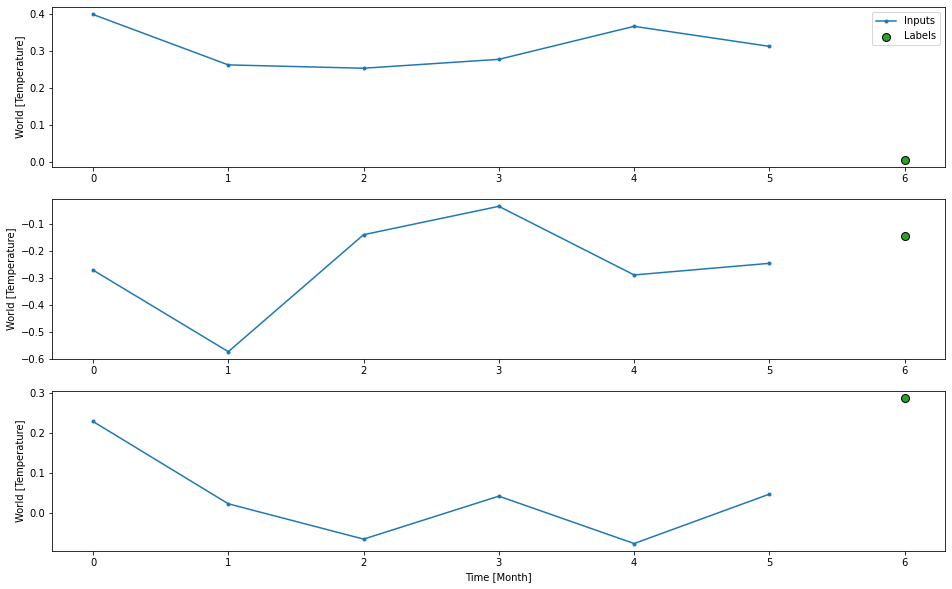

In [18]:
w2.plot()

In [19]:
example_window = tf.stack([np.array(data)])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 708, 101)
Inputs shape: (1, 696, 101)
Labels shape: (1, 12, 1)


In [20]:
w1.example = example_inputs, example_labels

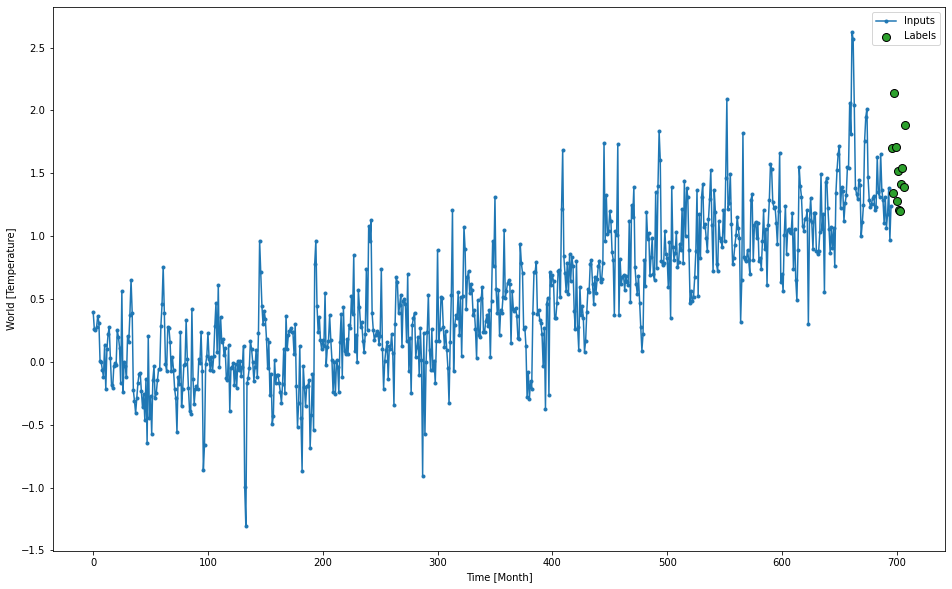

In [21]:
w1.plot()

## Se crea estructura de datos TF

In [22]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

## Se definen propiedades para acceder a TF

In [23]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
    # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

## Ventana de un solo paso

In [24]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=[to_analyze])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['World']

## Modelo base

In [25]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [26]:
baseline = Baseline(label_index=column_indices[to_analyze])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

5/5 [==============================] - 0s 2ms/step - loss: 0.1315 - mean_absolute_error: 0.2686


## Ventana amplia

In [27]:
wide_window = WindowGenerator(
    input_width=12, label_width=12, shift=1,
    label_columns=[to_analyze])

wide_window

Total window size: 13
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Label column name(s): ['World']

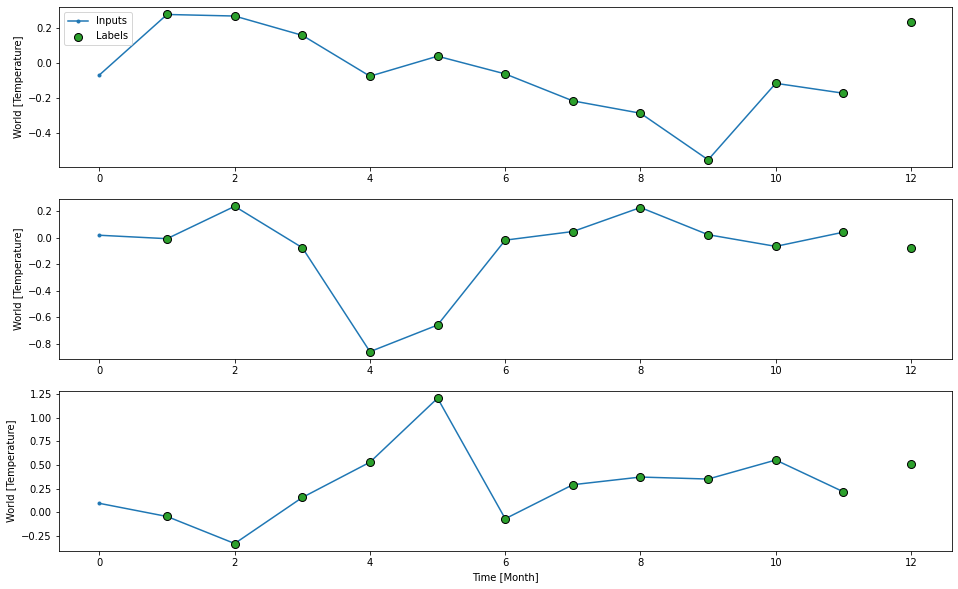

In [28]:
wide_window.plot()

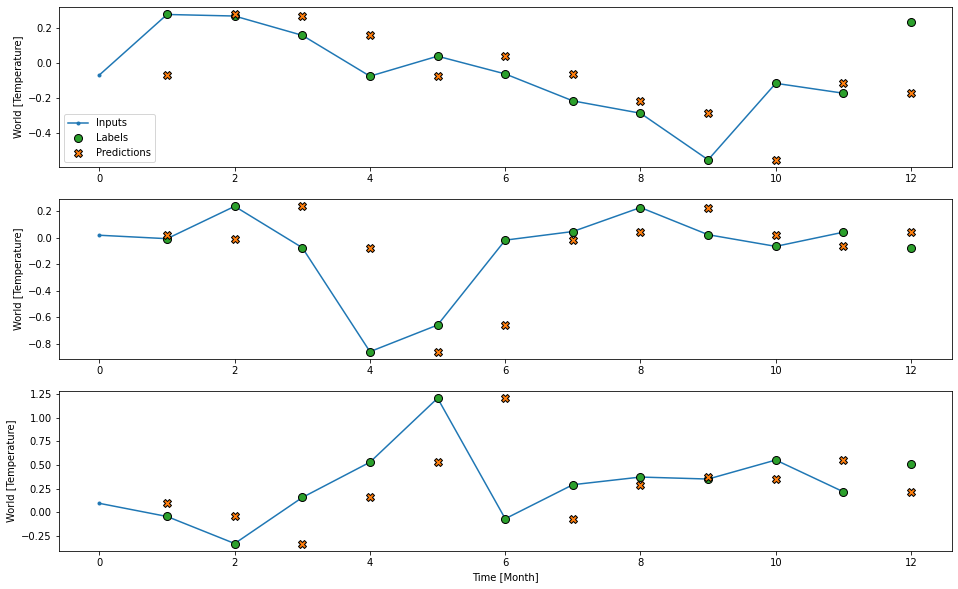

In [29]:
wide_window.plot(baseline)

## Graficas de aprendizaje

In [30]:
from IPython.display import clear_output

class PlotLearning(tf.keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

## Entrenamiento del modelo

In [31]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=10):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.metrics.MeanAbsoluteError()],
                )

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                    validation_data=window.val,
                    callbacks=[early_stopping,PlotLearning()])
    return history

## Implementacion de modelos

## Ventana de entrenamiento

## Ventana convolucional

In [32]:
conv_forecast = 1

CONV_WIDTH = 140
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=conv_forecast,
    shift=1,
    label_columns=[to_analyze])

conv_window

Total window size: 141
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139]
Label indices: [140]
Label column name(s): ['World']

Text(0.5, 1.0, 'Given 140 months of inputs, predict 1 month into the future.')

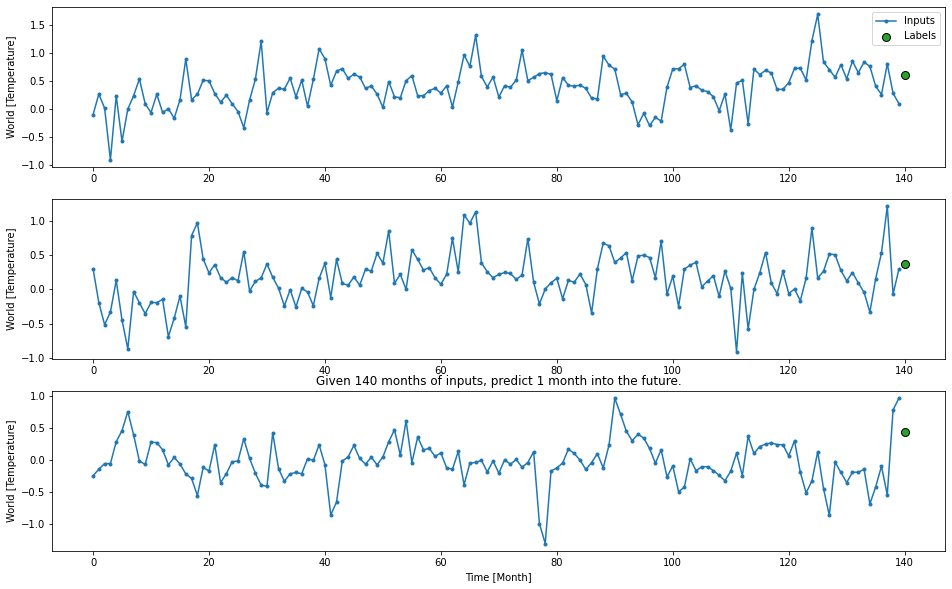

In [33]:
conv_window.plot()
plt.title("Given 140 months of inputs, predict 1 month into the future.")

## Resultados modelo base

In [34]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(conv_window.val)
performance['Baseline'] = baseline.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 128ms/step - loss: 0.1010 - mean_absolute_error: 0.2516


## CNN

## Modelo Convolucional

In [35]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                        kernel_size=(CONV_WIDTH,),
                        activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

### Ventana pequeña

In [36]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 46ms/step - loss: 0.0775 - mean_absolute_error: 0.2759


### Ventana amplia

In [37]:
LABEL_WIDTH = 140
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=[to_analyze])

wide_conv_window

Total window size: 280
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

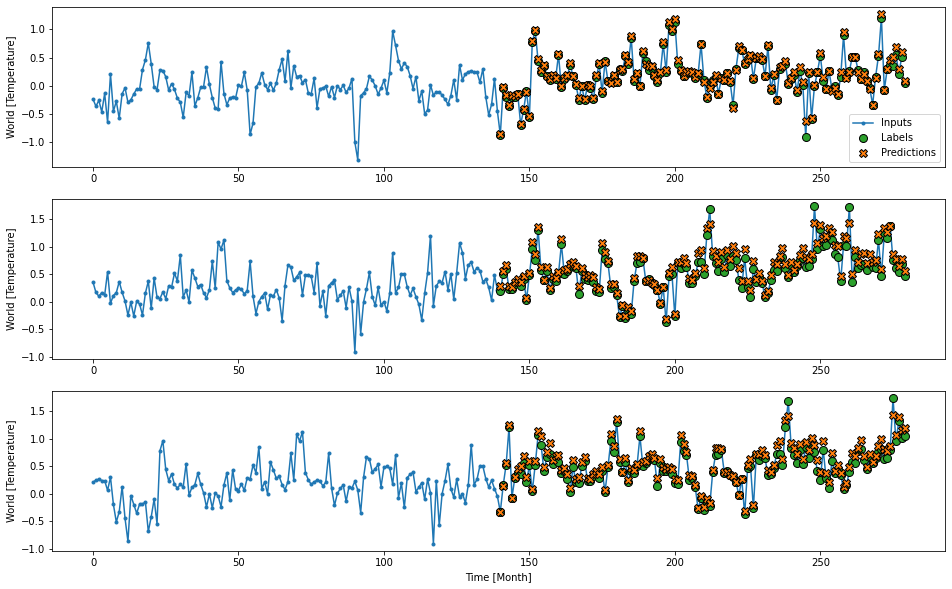

In [38]:
wide_conv_window.plot(conv_model)

## Creacion de modelo multi-output

In [39]:
#loaded_model = tf.keras.models.load_model("convolutional_model.h5")

In [40]:
train_df

,World,Annex I countries,Non-Annex I countries,Asia,Net Food Importing Developing Countries,Land Locked Developing Countries,Small Island Developing States,French Guiana,Americas,OECD,Brazil,Suriname,Europe,Low Income Food Deficit Countries,Eastern Africa,Polynesia,Least Developed Countries,Eastern Europe,Africa,South America,Malaysia,Micronesia,Guinea-Bissau,Sri Lanka,Grenada,Saint Vincent and the Grenadines,Saint Lucia,United Republic of Tanzania,Seychelles,Venezuela (Bolivarian Republic of),Dominican Republic,Côte d'Ivoire,Indonesia,Middle Africa,Peru,South-Eastern Asia,Wallis and Futuna Islands,Togo,Democratic Republic of the Congo,Kenya,...,United States Virgin Islands,"Saint Helena, Ascension and Tristan da Cunha",Melanesia,British Virgin Islands,Myanmar,Uganda,Caribbean,Iran (Islamic Republic of),United States of America,Nicaragua,Benin,Central America,Papua New Guinea,Western Asia,Fiji,Senegal,Northern Africa,Bahrain,Western Africa,Qatar,Saudi Arabia,Kuwait,Angola,Bhutan,Mexico,Canada,Honduras,El Salvador,Mozambique,European Union,Southern Europe,Guatemala,Iraq,Oceania,Southern Africa,Cyprus,South Africa,Mongolia,Lebanon,Syrian Arab Republic
0,0.399,0.808,0.108,0.182,0.266,0.169,-0.034,0.080,0.339,0.437,-0.108,0.095,1.086,0.350,0.371,0.261,0.349,1.228,0.105,0.015,-0.106,0.217,-0.463,0.314,0.505,0.481,0.524,0.832,0.223,0.229,0.844,-0.166,-0.062,0.434,0.279,-0.099,0.917,0.189,0.267,0.460,...,0.562,0.321,-0.282,0.565,0.636,0.490,0.300,0.434,0.943,-0.160,0.293,-0.240,-0.321,0.585,0.463,-0.817,0.127,0.646,-0.350,0.719,0.945,0.452,0.209,1.221,-0.310,0.462,0.152,0.425,0.192,0.169,-0.337,0.301,0.146,0.235,-0.372,0.251,-0.307,-0.077,0.148,-0.007
1,0.263,1.155,-0.384,-0.136,-0.594,-0.730,0.195,-0.219,0.279,0.756,-0.243,-0.125,1.921,-1.058,-0.115,0.105,-0.897,1.722,-0.814,-0.128,0.157,0.359,-0.104,-0.360,0.226,0.209,0.240,-0.319,0.399,-0.113,0.595,-0.392,0.152,-1.057,-0.073,0.231,0.010,-0.963,-0.651,0.125,...,0.346,-0.035,0.120,0.394,0.174,-0.387,0.930,-0.630,1.215,0.151,-1.484,-0.111,0.101,-0.649,0.101,-0.482,-0.907,-0.303,-1.571,-0.260,-0.870,-0.131,-0.545,-0.665,-0.170,0.301,0.221,0.270,0.005,3.151,1.507,0.164,-0.539,-0.005,0.164,-1.038,0.357,2.362,-1.290,-0.940
2,0.254,0.826,-0.163,0.095,-0.200,-0.526,0.137,0.082,-0.150,0.205,-0.018,0.157,1.863,-0.224,0.246,-0.514,-0.333,1.789,-0.492,-0.098,0.156,0.189,-0.044,0.077,0.304,0.304,0.240,0.244,0.314,0.122,-0.156,0.395,0.198,-0.276,-0.063,0.167,0.416,0.263,0.094,0.551,...,0.255,0.683,0.030,0.344,-0.019,0.327,0.408,-0.479,0.656,-0.050,-0.534,0.181,-0.013,-1.027,0.360,-0.300,-1.004,-0.885,-1.024,-1.022,-1.060,-1.328,0.170,0.007,0.204,-1.023,-0.019,-0.067,0.710,2.508,1.717,0.218,-1.949,0.180,0.076,-1.058,0.348,1.057,-1.349,-1.547
3,0.278,0.327,0.238,0.288,0.244,0.460,0.132,0.100,-0.303,-0.029,0.218,0.145,0.986,0.035,0.444,0.137,0.085,0.886,0.318,0.064,-0.057,0.248,-0.350,-0.101,0.549,0.547,0.415,0.427,0.223,0.357,0.282,-0.152,0.064,-0.008,-0.271,0.055,0.253,-0.178,0.070,0.412,...,0.527,0.367,0.062,0.574,0.118,0.137,0.311,-1.345,-1.210,0.263,-0.265,0.209,0.080,-0.360,0.219,0.050,0.571,-0.469,0.079,-0.787,-0.853,-1.065,0.116,0.364,0.206,-0.222,0.146,0.241,0.971,1.891,2.253,0.237,-0.366,0.578,0.570,0.355,0.537,3.176,0.222,0.506
4,0.367,0.318,0.397,0.064,0.508,0.525,-0.006,0.167,-0.042,-0.290,0.325,0.113,1.089,0.528,0.988,0.293,0.631,1.260,0.684,0.499,0.169,-0.100,0.719,-0.373,0.337,0.332,0.163,1.025,0.366,0.750,0.324,0.427,-0.003,0.456,0.306,-0.105,0.886,0.618,0.407,0.837,...,0.301,0.267,-0.138,0.343,-0.142,0.362,-0.063,1.233,-0.348,0.176,0.569,0.564,-0.170,0.229,0.730,0.723,0.932,-0.591,0.578,-0.484,-0.182,0.382,0.786,0.154,0.672,-0.839,-0.009,0.131,1.387,-0.108,0.632,-0.091,0.987,-0.160,-0.024,0.532,-0.232,-0.530,0.696,0.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): None

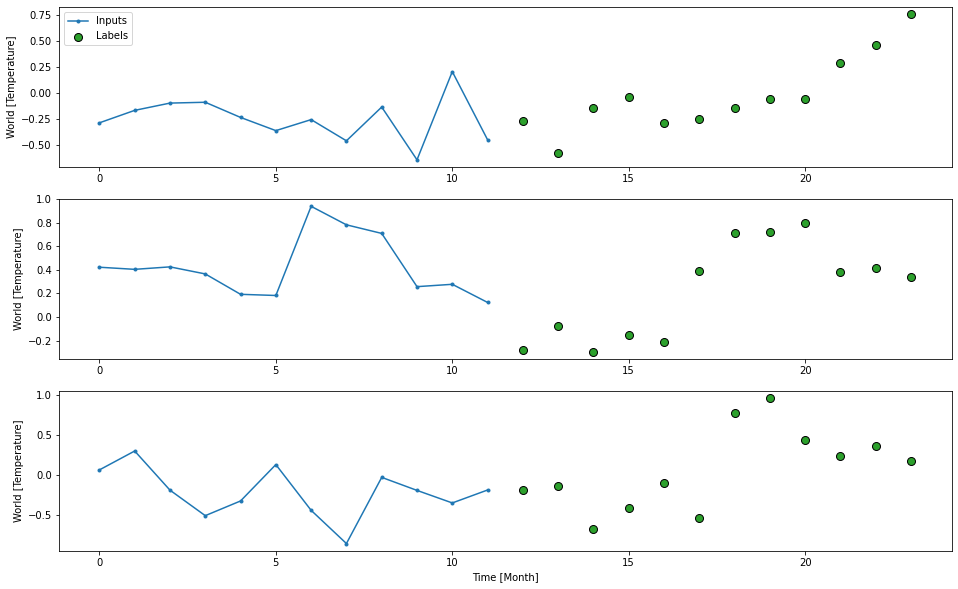

In [41]:
#OUT_STEPS = int(np.floor(len(val_df)/2))
OUT_STEPS = 12

multi_window = WindowGenerator(input_width=OUT_STEPS,
                            label_width=OUT_STEPS,
                            shift=OUT_STEPS)

multi_window.plot()
multi_window


4/4 [==============================] - 0s 3ms/step - loss: 0.8564 - mean_absolute_error: 0.6304


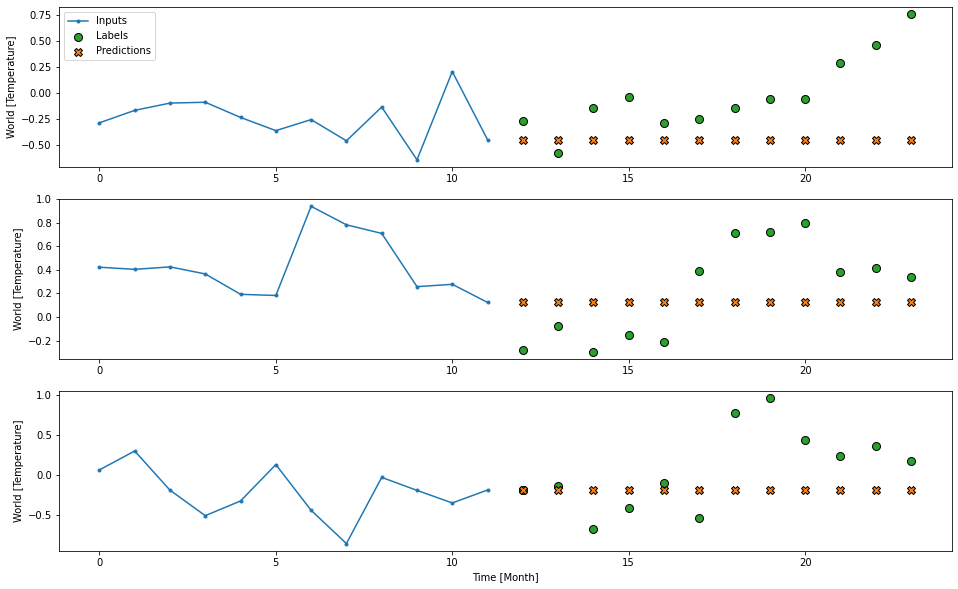

In [42]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                    metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

### Base

4/4 [==============================] - 0s 3ms/step - loss: 0.9106 - mean_absolute_error: 0.6418


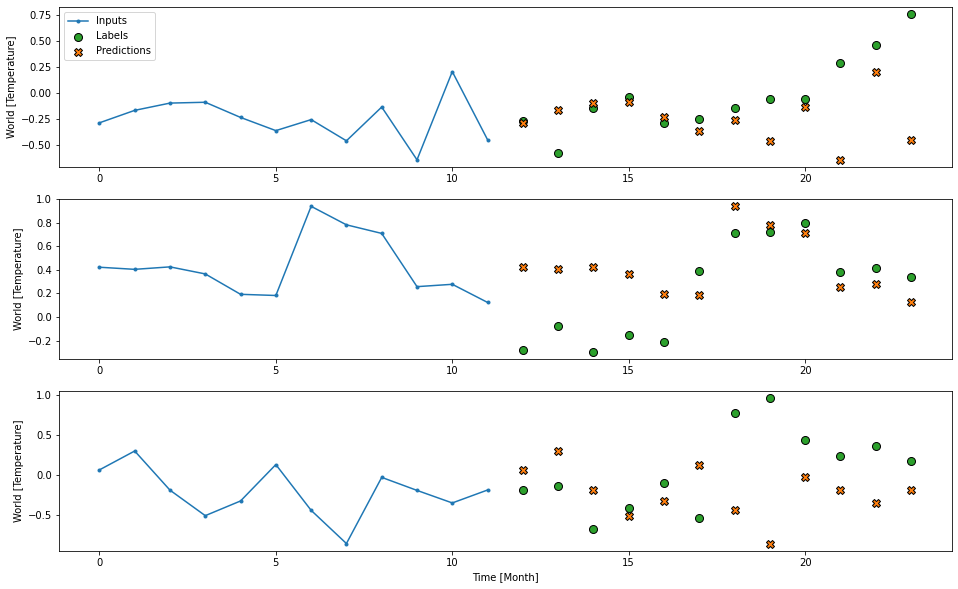

In [43]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Periodicidad hiperparámetro

In [44]:
metrics = {}

for i in range(1, 60):

    OUT_STEPS = i

    multi_window = WindowGenerator(input_width=OUT_STEPS,
                                label_width=OUT_STEPS,
                                shift=OUT_STEPS)


    multi_val_performance = {}
    multi_performance = {}
    repeat_baseline = RepeatBaseline()
    repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])


    multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
    multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)

    metrics[i] = multi_val_performance["Repeat"][0]


1/1 [==============================] - 0s 109ms/step - loss: 0.7941 - mean_absolute_error: 0.6111


In [45]:
min_keys=[key for key in list(metrics.keys()) if key%12==0]
min_values=[metrics[key] for key in min_keys]

Text(0, 0.5, 'MSE')

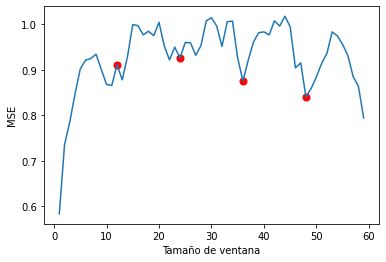

In [46]:
plt.plot(list(metrics.keys()), list(metrics.values()))
plt.scatter(min_keys,min_values,color='red',s=50)
plt.xlabel('Tamaño de ventana')
plt.ylabel('MSE')

In [47]:
metrics_df = pd.DataFrame(metrics.values())
metrics_df.sort_values(by = [0])

,0
0,0.583185
1,0.735271
2,0.785554
58,0.794081
47,0.840579
3,0.846758
48,0.859047
57,0.863908
10,0.865601
9,0.867827


### Ventana a usar para entrenamiento

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): None

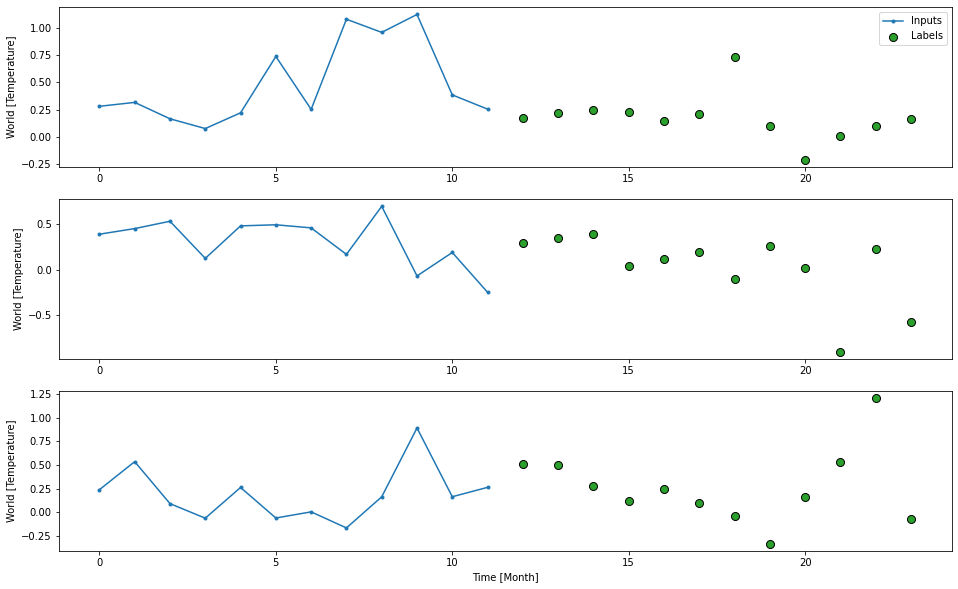

In [48]:
OUT_STEPS = 12

multi_window = WindowGenerator(input_width=OUT_STEPS,
                            label_width=OUT_STEPS,
                            shift=OUT_STEPS)

multi_window.plot()
multi_window

### Lineal

4/4 [==============================] - 0s 3ms/step - loss: 0.5421 - mean_absolute_error: 0.5186


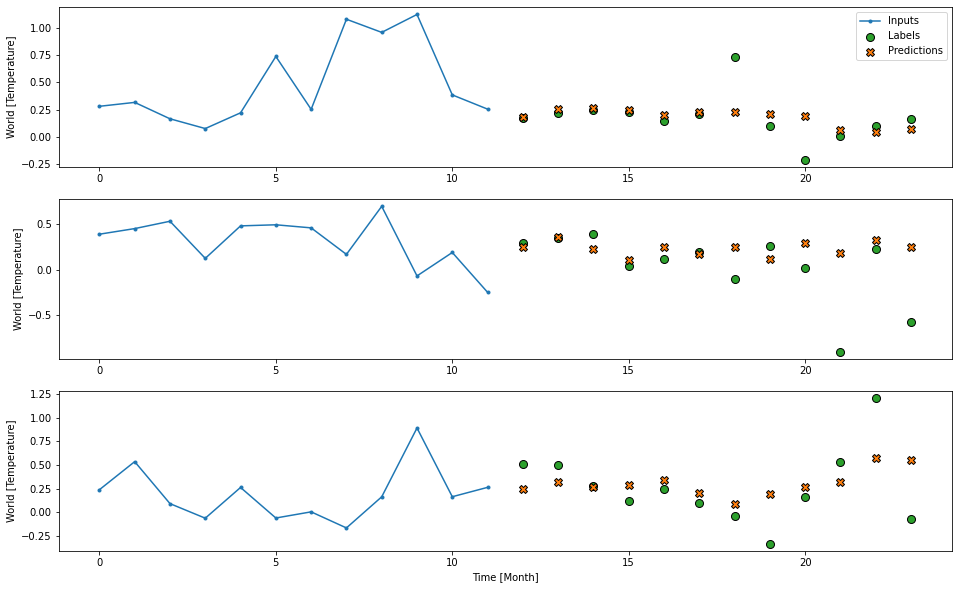

In [49]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### Denso

4/4 [==============================] - 0s 4ms/step - loss: 0.5781 - mean_absolute_error: 0.5423


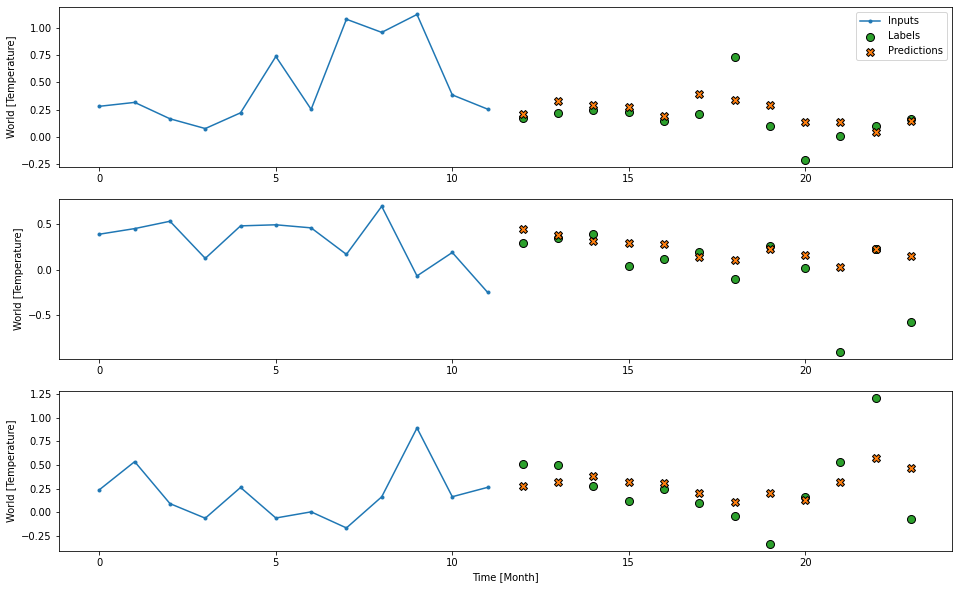

In [50]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### CNN

4/4 [==============================] - 0s 4ms/step - loss: 0.6013 - mean_absolute_error: 0.5658


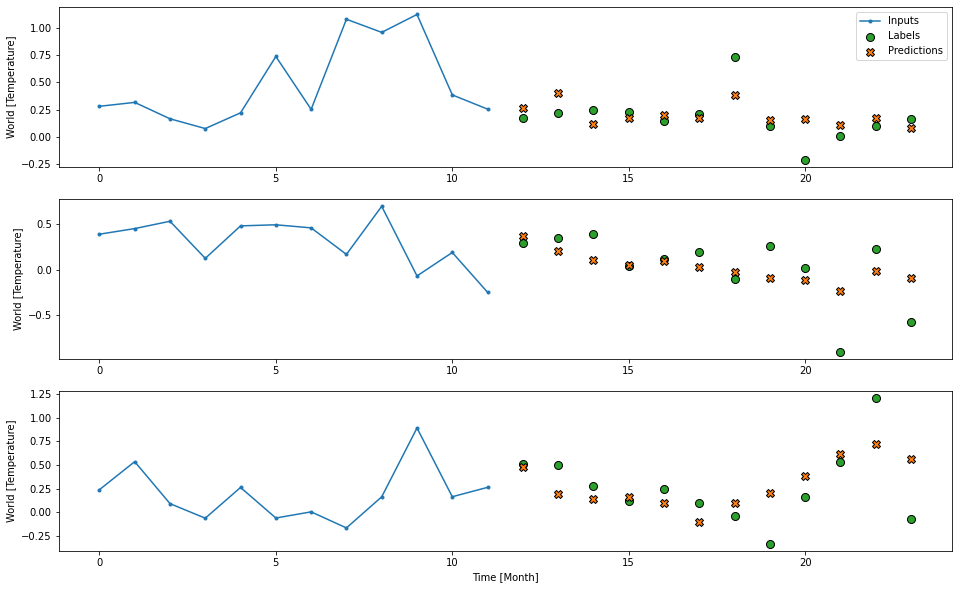

In [51]:
CONV_WIDTH = 12
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(62, activation='tanh', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),

    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

In [52]:
error_estimated=np.sqrt(multi_val_performance['Conv'][0])/np.sqrt(12)
error_estimated

0.2238501612815421

## Exportación del modelo

In [53]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 32)          452512    
                                                                 
 dense (Dense)               (None, None, 64)          2112      
                                                                 
 dense_1 (Dense)             (None, None, 32)          2080      
                                                                 
 dense_2 (Dense)             (None, None, 16)          528       
                                                                 
 dense_3 (Dense)             (None, None, 1)           17        
                                                                 
Total params: 457,249
Trainable params: 457,249
Non-trainable params: 0
_________________________________________________________________


In [54]:
conv_model.save("convolutional_model2.h5")

In [55]:
multi_conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 12, 101)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 62)             75206     
                                                                 
 dense_7 (Dense)             (None, 1, 1212)           76356     
                                                                 
 reshape_2 (Reshape)         (None, 12, 101)           0         
                                                                 
Total params: 151,562
Trainable params: 151,562
Non-trainable params: 0
_________________________________________________________________


In [56]:
multi_conv_model.save("multi_convolutional_model.h5")

## Predicciones

In [57]:
to_analyze = 'World'
group = 'World'
time_lapse = 'Month'

data = df[world_lapse.columns[1:249]]

for column in data.columns:
    if data[column].isnull().values.any()==True:
        data=data.drop(column,axis=1)
most_correlated_temps=list(pd.DataFrame(data.corr().iloc[-1]).sort_values(by=[to_analyze],ascending=False).index)
n_features=100
data=data[most_correlated_temps[:n_features+1]]

column_indices = {name: i for i, name in enumerate(data.columns)}
n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]
num_features = data.shape[1]

In [58]:
OUT_STEPS = 12

multi_window = WindowGenerator(input_width=OUT_STEPS,
                            label_width=OUT_STEPS,
                            shift=OUT_STEPS,
                            train_df=train_df,
                            val_df=val_df,
                            test_df=test_df,
                            label_columns=[to_analyze]
                            )

In [59]:
def plot_final(self, model=None, plot_col=to_analyze, max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(16, 10))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [Temperature]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label='Inputs', marker='.', zorder=-10)  
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index    
        if label_col_index is None:
            continue
            
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64) 
            
            
            x_to_plot=[self.input_indices[-1],self.label_indices[0]]

            y_to_plot=[inputs[n, :, plot_col_index][-1],predictions[n, :, label_col_index][0]]
            
            plt.plot(x_to_plot, y_to_plot, c='red',alpha=0.3)

            plt.plot(self.label_indices, predictions[n, :, label_col_index], c='red',alpha=0.3)  
                        
        if n == 0:
            plt.legend()    
    plt.xlabel('Time [Month]')

WindowGenerator.plot_final = plot_final

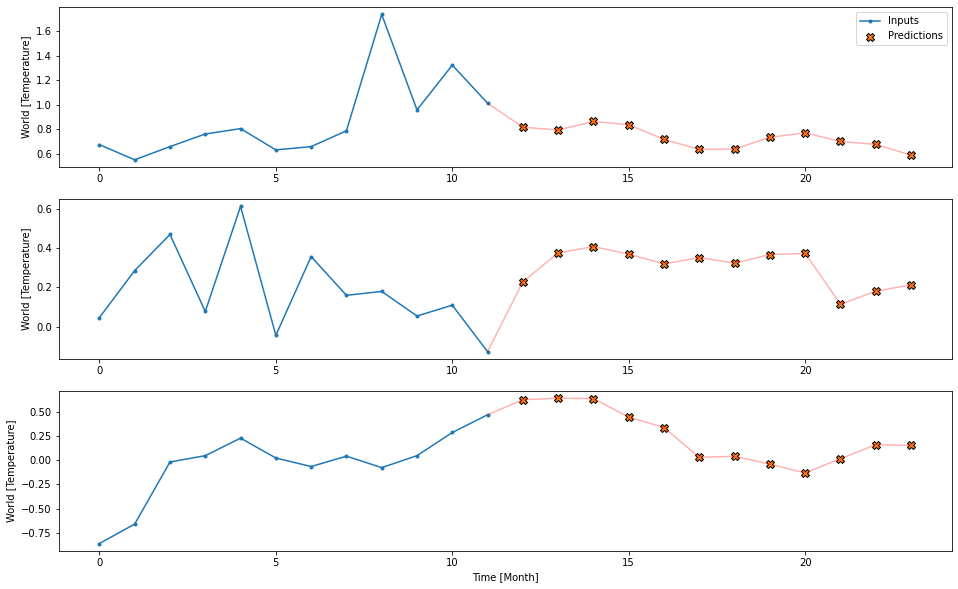

In [60]:
multi_window.plot_final(multi_conv_model)